#  Seven key steps in using Keras to create a neural network or deep learning model, step-by-step including:
1)Importing necessary Libraries
2)How to load data.
3)How to define a neural network in Keras.
4)How to compile a Keras model using the efficient numerical backend.
5)How to train a model on data.
6)How to evaluate a model on data.
7)How to make predictions with the model.

In [16]:
# first neural network with keras tutorial
from numpy import loadtxt
import numpy as np
import pandas as pd
from keras import models
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [17]:
dataframe = pd.read_csv('pima-indians-diabetes.csv', delimiter=',')
dataframe.head()


,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [18]:
# split into input (X) and output (y) variables
X = dataframe.iloc[:,:8]
y = dataframe.iloc[:,8]


In [19]:
dataframe.shape

(767, 9)

In [20]:
features_train,features_test,target_train,target_test=train_test_split(X,y,test_size=0.33,random_state=0)

In [21]:
# define the keras model
network=models.Sequential()
network.add(Dense(units=8,activation="relu",input_shape=(features_train.shape[1],)))
network.add(Dense(units=8,activation="relu"))
#network.add(Dense(units=16,activation="relu"))
network.add(Dense(units=1,activation="sigmoid"))

In [22]:
# compile the keras model
network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
#network.compile(loss='mse', optimizer='RMSprop', metrics=['accuracy'])

In [24]:
# fit the keras model on the dataset
#network.fit(features_train,features_test, epochs=10, batch_size=100,verbose=2)
history=network.fit(features_train,target_train,epochs=20,verbose=1,batch_size=100,validation_data=(features_test,target_test))

Train on 513 samples, validate on 254 samples
Epoch 1/20
513/513 [==============================] - 0s 327us/step - loss: 23.8525 - accuracy: 0.6316 - val_loss: 18.4057 - val_accuracy: 0.6929
Epoch 2/20
513/513 [==============================] - 0s 29us/step - loss: 19.1240 - accuracy: 0.6316 - val_loss: 14.3790 - val_accuracy: 0.6929
Epoch 3/20
513/513 [==============================] - 0s 39us/step - loss: 14.6355 - accuracy: 0.6316 - val_loss: 10.6533 - val_accuracy: 0.6929
Epoch 4/20
513/513 [==============================] - 0s 47us/step - loss: 10.5196 - accuracy: 0.6316 - val_loss: 7.1659 - val_accuracy: 0.6929
Epoch 5/20
513/513 [==============================] - 0s 45us/step - loss: 6.8415 - accuracy: 0.6355 - val_loss: 4.1935 - val_accuracy: 0.7008
Epoch 6/20
513/513 [==============================] - 0s 43us/step - loss: 3.7177 - accuracy: 0.6550 - val_loss: 2.3824 - val_accuracy: 0.6378
Epoch 7/20
513/513 [==============================] - 0s 33us/step - loss: 2.2131 - accu

In [25]:
training_loss=history.history["loss"]
test_loss=history.history["val_loss"]

In [26]:
epoch_count=range(1,len(training_loss)+1)

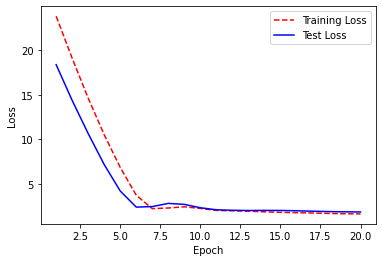

In [27]:
plt.plot(epoch_count,training_loss,"r--")
plt.plot(epoch_count,test_loss,"b-")
plt.legend(["Training Loss","Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [32]:
_, accuracy = network.evaluate(features_train,target_train)
print('Accuracy: %.2f' % (accuracy*100))

513/513 [==============================] - 0s 215us/step
Accuracy: 63.16


In [43]:
# preict using the keras model
predicted_target= network.predict(features_test)

In [44]:
_, accuracy = network.evaluate(features_test,target_test)
print('Accuracy: %.2f' % (accuracy*100))

254/254 [==============================] - 0s 35us/step
Accuracy: 60.24


In [56]:
#Y=target_train
for i in range(10):
    print(predicted_target[i])

[0.44970706]
[0.4993118]
[0.9906837]
[0.44786653]
[0.02075692]
[0.03176354]
[0.999443]
[0.5751261]
[0.04377431]
[0.8482277]


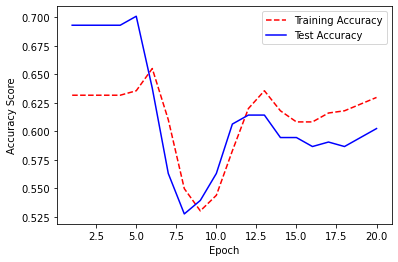

In [46]:
training_accuracy=history.history["accuracy"]
test_accuracy=history.history["val_accuracy"]
plt.plot(epoch_count,training_accuracy,"r--")
plt.plot(epoch_count,test_accuracy,"b-")
plt.legend(["Training Accuracy","Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show()
